Semi-inducibility
=================

Alternating $C_6$ and alternating $P_3$

In [1]:
G = GraphTheory

G.printlevel(0)

def check_blocks(flg, do, dont):
    eds = flg.blocks("edges")
    for ee in do:
        if ee not in eds:
            return False
    for ee in dont:
        if ee in eds:
            return False
    return True

AG = Theory("GraphAlter", "oedges")
CG = combine("EColoredGraph", G, AG, symmetries=FullSymmetry)
CG.exclude(CG(2, edges=[[0, 1]], oedges=[[0, 1]]))

def get_targ(ff):
    vn = ff.size()
    eddo = ff.blocks("edges")
    eddont = ff.blocks("oedges")
    pats = G.p(vn, edges=eddo, edges_m=eddont)
    targ = 0
    for xx in pats.compatible_flags():
        coef = 0
        for eperm in itertools.permutations(range(vn)):
            xxpermed = xx.subflag(eperm)
            if check_blocks(xxpermed, eddo, eddont):
                coef += 1
        targ += coef*xx
    return targ*(QQ(1/len(ff.automorphisms())))

def gen_nont(n):
    ret = []
    for ff in CG.generate(n):
        eds = ff.blocks("edges")
        oeds = ff.blocks("oedges")
        if len(eds)!=0 and len(oeds)!=0:
            if len(eds) + len(oeds) != binomial(n, 2):
                GG = Graph([list(range(n)), list(eds)+list(oeds)])
                if GG.is_connected():
                    ret.append(ff)
    return ret

In [2]:
gen4 = gen_nont(4)

In [3]:
len(gen4)

17

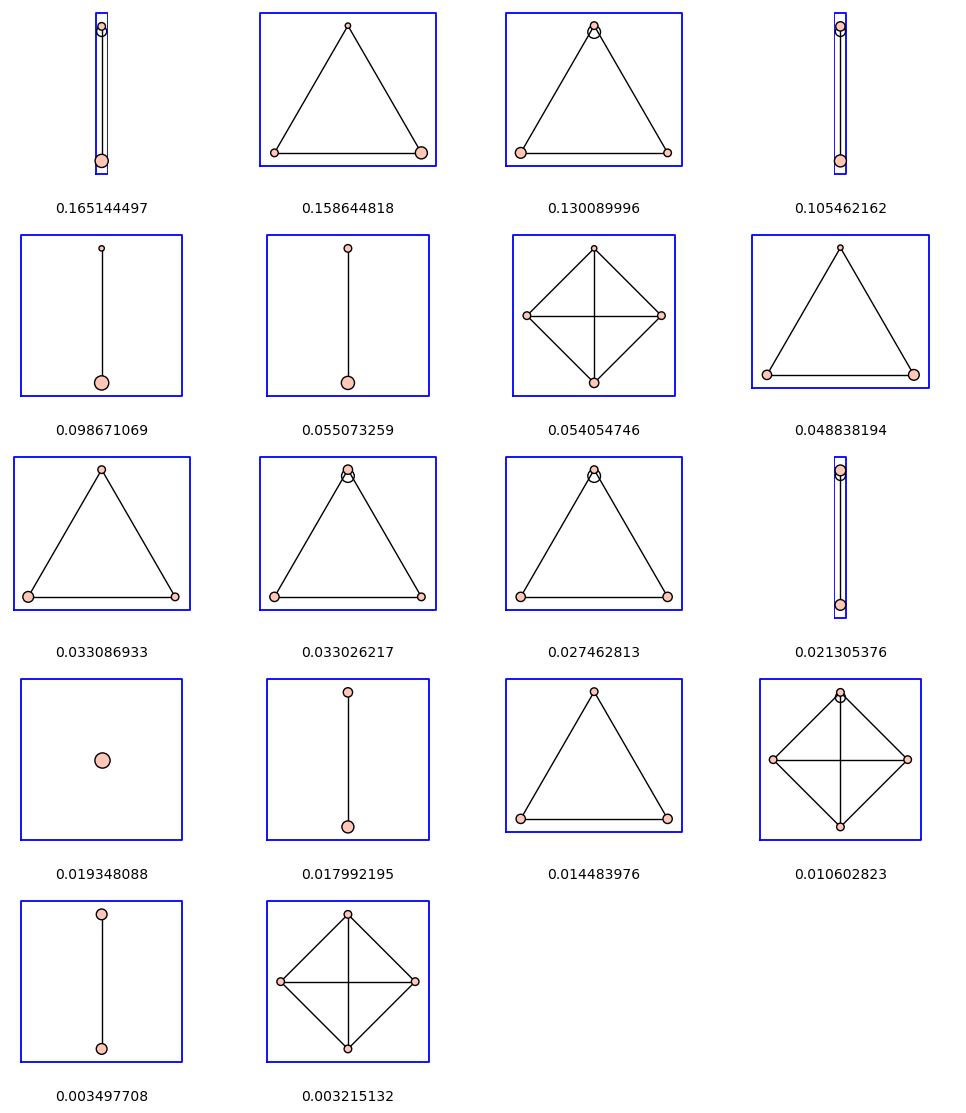

In [194]:
targ = get_targ(gen4[4])
cert = G.optimize(targ, 8, file="notebook")
asd = G.construction_from_certificate(cert)
flag_vector_plot(asd, merge=True)

In [24]:
(32/9).n()

3.55555555555556

In [7]:
G.optimize(get_targ(gen4[0]), 4, exact=True, construction=G.blowup_construction(4, 1, edges={(0, 0): 1/3}))

16/9

In [9]:
G.optimize(get_targ(gen4[1]), 4, exact=True, construction=G.blowup_construction(4, 1, edges={(0, 0): 1/3}))

16/9

In [90]:
G.optimize(get_targ(gen4[2]), 7, exact=False)

3.602001812553755

In [69]:
G.optimize(get_targ(gen4[3]), 4, exact=True, construction=G.blowup_construction(4, 3, edges=[[0, 0], [1, 1], [2, 2]]))

32/9

In [91]:
G.optimize(get_targ(gen4[4]), 7, exact=False)

1.8007739803111191

In [41]:
G.optimize(get_targ(gen4[5]), 5, exact=True, construction=G.blowup_construction(5, 2, edges=[[0, 1]]))

3/2

In [46]:
G.optimize(get_targ(gen4[6]), 4, exact=True, construction=G.blowup_construction(4, 1, edges={(0, 0): 1/4}))

81/64

In [114]:
G.optimize(get_targ(gen4[7]), 4, exact=True, construction=G.blowup_construction(4, 3, edges=[[0, 0], [1, 1], [2, 2]]))

8/9

In [88]:
G.optimize(get_targ(gen4[8]), 7, exact=True, construction=G.blowup_construction(7, 5, edges=[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4]]))

288/125

In [112]:
G.optimize(get_targ(gen4[9]), 5, exact=True, construction=G.blowup_construction(5, 2, edges=[[0, 0], [1, 1]]))

3

In [110]:
G.optimize(get_targ(gen4[10]), 4, exact=True)

3/2

In [109]:
G.optimize(get_targ(gen4[11]), 5, exact=True)

3/4

In [116]:
G.optimize(get_targ(gen4[12]), 4, exact=True)

3/8

In [149]:
G.optimize(get_targ(gen4[13]), 5, exact=True, construction=G.blowup_construction(5, 2, edges=[[0, 0], [1, 1]]))

3/2

In [158]:
G.optimize(get_targ(gen4[14]), 4, exact=True, construction=G.blowup_construction(4, 2, edges={(0, 1): 2/3}))

8/9

In [151]:
G.optimize(get_targ(gen4[15]), 5, exact=True, construction=G.blowup_construction(5, 2, edges=[[0, 1]]))

3/2

In [122]:
G.optimize(get_targ(gen4[16]), 5, exact=True)

3/2

In [ ]:
#List of 5 structures and the bounds

In [140]:
for ff in gen_nont(5):
    targff = get_targ(ff)
    bound = G.optimize(targff, 7)
    print("{} has bound {}".format(ff.blocks(), bound))

{'edges': ((0, 1),), 'oedges': ((0, 2), (0, 3), (0, 4))} has bound 2.1093750367796265
{'edges': ((0, 1),), 'oedges': ((0, 2), (0, 3), (1, 4))} has bound 6.328125024446512
{'edges': ((0, 1), (0, 2), (0, 3)), 'oedges': ((1, 4),)} has bound 8.888888889921079
{'edges': ((0, 2),), 'oedges': ((0, 1), (0, 3), (1, 4))} has bound 12.656250047349786
{'edges': ((0, 4),), 'oedges': ((0, 3), (1, 2), (1, 4))} has bound 12.65625016115396
{'edges': ((0, 3),), 'oedges': ((0, 4), (1, 2), (1, 4))} has bound 12.656250053615958
{'edges': ((0, 1),), 'oedges': ((0, 2), (0, 3), (0, 4), (1, 4))} has bound 6.328125000565409
{'edges': ((0, 1), (0, 2), (0, 3), (0, 4)), 'oedges': ((1, 4),)} has bound 4.44444444451582
{'edges': ((0, 2),), 'oedges': ((0, 1), (0, 3), (0, 4), (1, 4))} has bound 5.000000001213739
{'edges': ((0, 1),), 'oedges': ((0, 3), (0, 4), (1, 2), (1, 4))} has bound 6.328125000663342
{'edges': ((0, 4),), 'oedges': ((0, 1), (0, 3), (1, 2), (1, 4))} has bound 12.656250000877193
{'edges': ((0, 3),), '

In [24]:
(15/16).n()

0.937500000000000

In [22]:
alterc6 = CG(6, edges=[[0, 1], [2, 3], [4, 5]], oedges=[[1, 2], [3, 4], [5, 0]])
c6targ = get_targ(alterc6)
asd = G.blowup_construction(6, 4, edges={(0, 0): 1, (1, 1): 1, (2, 3): 1, (0, 2): 1/2, (0, 3): 1/2, (1, 2): 1/2, (1, 3): 1/2})
asd.density(c6targ)

465/512

In [28]:
(465/512).n()

0.908203125000000

In [2]:
alterc6 = CG(6, edges=[[0, 1], [2, 3], [4, 5]], oedges=[[1, 2], [3, 4], [5, 0]])
c6targ = get_targ(alterc6)
constr = G.blowup_construction(6, 1, edges={(0, 0): 1/2})
G.optimize(c6targ, 6, construction=constr, exact=True, file="certificates/semiind_c6")

15/16

In [48]:
cert = G.optimize(c6targ + G(4, edges=[[0, 1], [1, 2], [2, 3], [3, 0]])*(1/10000), 6, file="notebook")

In [49]:
oc = G.construction_from_certificate(cert)

In [50]:
cert["result"] - (15/16)

4.924799354988352e-06

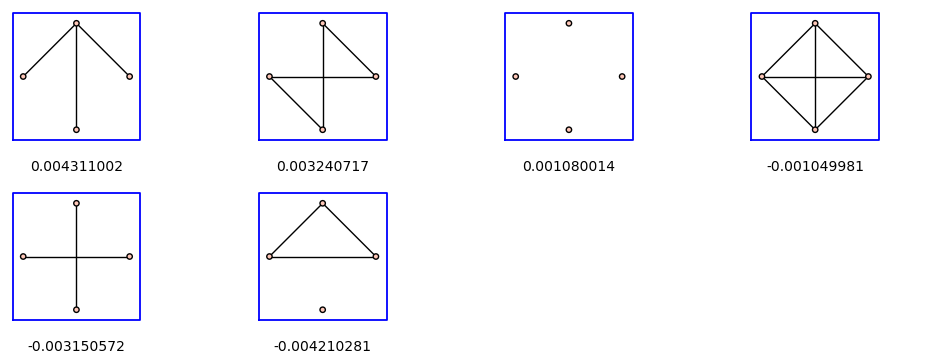

In [61]:
flag_vector_plot((oc - constr)>>2, threshold=2e-4)

In [8]:
c4hom = G(4, edges=[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]) + \
G(4, edges=[[0, 2], [0, 3], [1, 2], [1, 3], [2, 3]])*(1/3) + \
G(4, edges=[[0, 2], [0, 3], [1, 2], [1, 3], ])*(1/3)

G.blowup_construction(4, 1, edges={(0, 0): 1/2}).density(c4hom)

1/16

In [9]:
get_targ(CG(4, edges=[[0, 1], [1, 2], [2, 3], [3, 0]])) == c4hom

False

In [41]:
(1/8).n()

0.125000000000000

In [45]:
cert["result"]

0.06249999855726909

In [47]:
G.blowup_construction(6, 2, edges=[[0, 0], [1, 1]])

Flag Algebra Element over Rational Field
5/16  - Flag on 6 points, ftype from () with edges=(02 03 14 15 23 45)
15/32 - Flag on 6 points, ftype from () with edges=(01 04 05 14 15 23 45)
3/16  - Flag on 6 points, ftype from () with edges=(01 03 04 05 13 14 15 34 35 45)
1/32  - Flag on 6 points, ftype from () with edges=(01 02 03 04 05 12 13 14 15 23 24 25 34 35 45)

In [46]:
cert = G.optimize(c4hom, 6, maximize=True, positives=[G(2, edges=[[0, 1]], ftype=[0])-1/2, 1/2 - G(2, edges=[[0, 1]], ftype=[0])], file="notebook")
G.construction_from_certificate(cert)

Flag Algebra Element over Real Field with 53 bits of precision
0.0156294180989352   - Flag on 6 points, ftype from () with edges=()
0.0937765076041824   - Flag on 6 points, ftype from () with edges=(01 02 03 04 05)
0.156205789838713    - Flag on 6 points, ftype from () with edges=(02 03 14 15 23 45)
0.234308684983849    - Flag on 6 points, ftype from () with edges=(01 04 05 14 15 23 45)
0.234441268609538    - Flag on 6 points, ftype from () with edges=(02 03 04 05 12 13 14 15)
0.156294178999143    - Flag on 6 points, ftype from () with edges=(02 03 04 12 13 14 25 35 45)
0.0937234742468988   - Flag on 6 points, ftype from () with edges=(01 03 04 05 13 14 15 34 35 45)
0.0156205792805854   - Flag on 6 points, ftype from () with edges=(01 02 03 04 05 12 13 14 15 23 24 25 34 35 45)

In [37]:
for c in [1/10, 1/5, 1/2, 1, 2, 10]:
    bound = G.optimize(c6targ + c*c4hom, 6, positives=[G(2, edges=[[0, 1]], ftype=[0])-1/2, 1/2 - G(2, edges=[[0, 1]], ftype=[0])])
    expected = (c/16 + 15/16).n()
    print("With c={} the bound is {} (expected {})".format(c, bound, expected))

With c=1/10 the bound is 0.9437604231660994 (expected 0.943750000000000)
With c=1/5 the bound is 0.9500416683518835 (expected 0.950000000000000)
With c=1/2 the bound is 0.969010418110654 (expected 0.968750000000000)
With c=1 the bound is 1.0010416775773012 (expected 1.00000000000000)
With c=2 the bound is 1.0666666715933322 (expected 1.06250000000000)
With c=10 the bound is 1.666666673308189 (expected 1.56250000000000)


In [13]:
G.optimize(c4hom, 6, positives=[c6targ-15/16], exact=True, construction=G.blowup_construction(6, 1, edges={(0, 0): 1/2}))

/home/levente/sage/src/sage/functions/other.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  return Integer(m(x))


3171/16384

In [21]:
alterp3 = CG(4, edges=[(0, 1), (2, 3)], oedges=[(1, 2)])
p3targ = get_targ(alterp3)
cons = G.blowup_construction(4, 1, edges={(0, 0): 2/3})
G.optimize(p3targ, 4, construction=cons, exact=True, file="certificates/semiind_p3")

16/9

In [4]:
from fractions import Fraction
from sage.algebras.combinatorial_theory import _unflatten_matrix
import pickle

def to_sage(dim, data):
    if dim==0:
        if isinstance(data, Fraction):
            return QQ(data)
        if isinstance(data, float):
            return RR(data)
        return data
    return [to_sage(dim-1, xx) for xx in data]

with open("certificates/semiind_p3.pickle", "rb") as f:
    ind2cert = pickle.load(f)

print("Kernels for the relevant ftypes")
Xmats = []
ftypes = G._get_relevant_ftypes(4)
for ii, (ts, ft, _) in enumerate(ftypes):
    print("\n\n\n====================\nFor ftype {} a basis for the certificate is:".format(ft))
    Xmat = matrix(to_sage(2, _unflatten_matrix(ind2cert["X matrices"][ii])[0]))
    Xmats.append(Xmat)
    kern = Xmat.image().basis()
    FA = FlagAlgebra(G, QQ, ft)
    for xx in kern:
        print("\n", FA(ts, xx))
    if len(kern)==0:
        print("<Empty kernel>")

Kernels for the relevant ftypes



For ftype Ftype on 2 points with edges=() a basis for the certificate is:

 Flag Algebra Element over Rational Field
1    - Flag on 3 points, ftype from (0, 1) with edges=()
0    - Flag on 3 points, ftype from (0, 2) with edges=(01)
1/2  - Flag on 3 points, ftype from (2, 0) with edges=(01)
-1/2 - Flag on 3 points, ftype from (1, 2) with edges=(01 02)

 Flag Algebra Element over Rational Field
0  - Flag on 3 points, ftype from (0, 1) with edges=()
1  - Flag on 3 points, ftype from (0, 2) with edges=(01)
-1 - Flag on 3 points, ftype from (2, 0) with edges=(01)
0  - Flag on 3 points, ftype from (1, 2) with edges=(01 02)



For ftype Ftype on 2 points with edges=(01) a basis for the certificate is:

 Flag Algebra Element over Rational Field
1    - Flag on 3 points, ftype from (0, 1) with edges=(01)
0    - Flag on 3 points, ftype from (0, 1) with edges=(01 02)
1/2  - Flag on 3 points, ftype from (1, 0) with edges=(01 02)
-1/2 - Flag on 3 points, ftype fro

In [4]:
from fractions import Fraction
from sage.algebras.combinatorial_theory import _unflatten_matrix
import pickle

def to_sage(dim, data):
    if dim==0:
        if isinstance(data, Fraction):
            return QQ(data)
        if isinstance(data, float):
            return RR(data)
        return data
    return [to_sage(dim-1, xx) for xx in data]

with open("certificates/semiind_c6.pickle", "rb") as f:
    ind2cert = pickle.load(f)

print("Kernels for the relevant ftypes")
Xmats = []
FXmats = []
ims = []
ftypes = G._get_relevant_ftypes(6)
for ii, (ts, ft, _) in enumerate(ftypes):
    print("\n\n\n====================\nFor ftype {} a basis for the certificate is:".format(ft))
    Xmat = matrix(to_sage(2, _unflatten_matrix(ind2cert["X matrices"][ii])[0]))
    Xmats.append(Xmat)
    ims.append(Xmat.image())
    kern = Xmat.image().basis()
    FA = FlagAlgebra(G, QQ, ft)
    fvs = []
    for xx in kern:
        fav = FA(ts, xx)
        print("\n", fav)
        fvs.append(fav)
    FXmats.append(fvs)
    if len(kern)==0:
        print("<Empty kernel>")

Kernels for the relevant ftypes



For ftype Ftype on 2 points with edges=() a basis for the certificate is:

 Flag Algebra Element over Rational Field
1  - Flag on 4 points, ftype from (0, 1) with edges=()
1  - Flag on 4 points, ftype from (0, 2) with edges=(01 03 13)
1  - Flag on 4 points, ftype from (2, 0) with edges=(01 03 13)
1  - Flag on 4 points, ftype from (2, 1) with edges=(01 02 13)
-1 - Flag on 4 points, ftype from (2, 3) with edges=(01 02 13)
-1 - Flag on 4 points, ftype from (1, 2) with edges=(01 02 03 13)
1  - Flag on 4 points, ftype from (0, 1) with edges=(02 03 12 13)
-2 - Flag on 4 points, ftype from (2, 3) with edges=(01 02 03 12 13)

 Flag Algebra Element over Rational Field
1  - Flag on 4 points, ftype from (0, 2) with edges=(01)
-2 - Flag on 4 points, ftype from (0, 2) with edges=(01 03 13)
-2 - Flag on 4 points, ftype from (2, 1) with edges=(01 02 13)
1  - Flag on 4 points, ftype from (2, 3) with edges=(01 02 13)
1  - Flag on 4 points, ftype from (1, 2) with edges

In [9]:
def check_codeg(pp, ft):
    eds = list(ft.blocks("edges"))
    eds = eds + [[pp[0], 4], [pp[1], 4]]
    asd = G.p(5, edges=eds, ftype=list(range(4)))
    return asd.afae()

check_codeg([0, 1], G._get_relevant_ftypes(6)[3][1])

/home/levente/sage/src/sage/algebras/combinatorial_theory.py:2919: UserWarning: The pattern is initialized with optional relations inside 
            the ftype. Those relations will be missing in the resulting pattern.
  return Pattern(self, n, ftype_points, **blocks)


Flag Algebra Element over Rational Field
1 - Flag on 5 points, ftype from (0, 1, 2, 3) with edges=(01 04 14)
1 - Flag on 5 points, ftype from (1, 4, 2, 3) with edges=(01 03 04 14)
1 - Flag on 5 points, ftype from (1, 4, 3, 2) with edges=(01 03 04 14)
1 - Flag on 5 points, ftype from (1, 4, 2, 3) with edges=(01 02 03 04 14)

In [15]:
import itertools

def check_codeg(pp, ft):
    eds = list(ft.blocks("edges"))
    eds = eds + [[pp[0], 4], [pp[1], 4]]
    asd = G.p(5, edges=eds, ftype=list(range(4)))
    return asd.afae()


print("Found codef equalities")
for ii, (ts, ft, _) in enumerate(G._get_relevant_ftypes(6)[:4]):
    if ts!=5:
        continue
    pairs = list(itertools.combinations(range(4), 2))
    for p0, p1 in itertools.combinations(pairs, 2):
        codeg_diff = check_codeg(p0, ft) - check_codeg(p1, ft)
        print(ft, p0, p1)
        print(codeg_diff)
        if codeg_diff.values() in ims[ii]:
            print("{} with pair {} and {}".format(ft, p0, p1))

Found codef equalities
Ftype on 4 points with edges=() (0, 1) (0, 2)
Flag Algebra Element over Rational Field
-1 - Flag on 5 points, ftype from (1, 2, 4, 3) with edges=(01 04)
1  - Flag on 5 points, ftype from (1, 4, 2, 3) with edges=(01 04)
-1 - Flag on 5 points, ftype from (1, 2, 3, 4) with edges=(01 03 04)
1  - Flag on 5 points, ftype from (1, 3, 2, 4) with edges=(01 03 04)
Ftype on 4 points with edges=() (0, 1) (0, 3)
Flag Algebra Element over Rational Field
-1 - Flag on 5 points, ftype from (1, 2, 3, 4) with edges=(01 04)
1  - Flag on 5 points, ftype from (1, 4, 2, 3) with edges=(01 04)
-1 - Flag on 5 points, ftype from (1, 2, 3, 4) with edges=(01 03 04)
1  - Flag on 5 points, ftype from (1, 3, 4, 2) with edges=(01 03 04)
Ftype on 4 points with edges=() (0, 1) (1, 2)
Flag Algebra Element over Rational Field
1  - Flag on 5 points, ftype from (1, 4, 2, 3) with edges=(01 04)
-1 - Flag on 5 points, ftype from (2, 1, 4, 3) with edges=(01 04)
1  - Flag on 5 points, ftype from (1, 3, 2, 

In [21]:
slack_kernel("certificates/semiind_c6", G, 12)



Based on kernels, the following could appear in construction:

Flag on 6 points, ftype from () with edges=()
Flag on 6 points, ftype from () with edges=(01)
Flag on 6 points, ftype from () with edges=(01 04)
Flag on 6 points, ftype from () with edges=(04 15)
Flag on 6 points, ftype from () with edges=(01 02 04)
Flag on 6 points, ftype from () with edges=(01 04 15)
Flag on 6 points, ftype from () with edges=(01 05 15)
Flag on 6 points, ftype from () with edges=(02 04 15)
Flag on 6 points, ftype from () with edges=(02 13 45)
Flag on 6 points, ftype from () with edges=(01 02 04 05)
Flag on 6 points, ftype from () with edges=(01 02 04 15)
Flag on 6 points, ftype from () with edges=(01 03 05 15)
Flag on 6 points, ftype from () with edges=(02 03 04 15)
Flag on 6 points, ftype from () with edges=(02 04 12 15)
Flag on 6 points, ftype from () with edges=(02 05 12 15)
Flag on 6 points, ftype from () with edges=(03 04 12 15)
Flag on 6 points, ftype from () with edges=(01 02 13 45)
Flag on 6 poi

In [24]:
digdiff_0 = G(3, edges=[[0, 2]], ftype=[0, 1]) - G(3, edges=[[0, 2]], ftype=[1, 0])
digdiff_1 = G(3, edges=[[0, 2], [0, 1]], ftype=[0, 1]) - G(3, edges=[[0, 2], [0, 1]], ftype=[1, 0])

In [6]:
G(1, ftype=[0])

Ftype on 1 points with edges=()

In [40]:
for xx in G.generate(3, G(1, ftype=[0])):
    relab = list(xx.ftype_points()) + list(xx.not_ftype_points())
    print(xx.subflag(points=relab))

Flag on 3 points, ftype from (0,) with edges=() [0, 1, 2]
Flag on 3 points, ftype from (0,) with edges=()

Flag on 3 points, ftype from (0,) with edges=(01) [0, 1, 2]
Flag on 3 points, ftype from (0,) with edges=(01)

Flag on 3 points, ftype from (2,) with edges=(01) [2, 0, 1]
Flag on 3 points, ftype from (0,) with edges=(12)

Flag on 3 points, ftype from (0,) with edges=(01 02) [0, 1, 2]
Flag on 3 points, ftype from (0,) with edges=(01 02)

Flag on 3 points, ftype from (1,) with edges=(01 02) [1, 0, 2]
Flag on 3 points, ftype from (0,) with edges=(01 12)

Flag on 3 points, ftype from (0,) with edges=(01 02 12) [0, 1, 2]
Flag on 3 points, ftype from (0,) with edges=(01 02 12)



In [41]:
G.generate(4, G(2, ftype=[0, 1]))

(Flag on 4 points, ftype from (0, 1) with edges=(),
 Flag on 4 points, ftype from (0, 2) with edges=(01),
 Flag on 4 points, ftype from (2, 0) with edges=(01),
 Flag on 4 points, ftype from (2, 3) with edges=(01),
 Flag on 4 points, ftype from (0, 2) with edges=(01 03),
 Flag on 4 points, ftype from (1, 2) with edges=(01 03),
 Flag on 4 points, ftype from (1, 3) with edges=(01 03),
 Flag on 4 points, ftype from (2, 0) with edges=(01 03),
 Flag on 4 points, ftype from (2, 1) with edges=(01 03),
 Flag on 4 points, ftype from (0, 1) with edges=(02 13),
 Flag on 4 points, ftype from (1, 2) with edges=(01 02 03),
 Flag on 4 points, ftype from (0, 2) with edges=(01 03 13),
 Flag on 4 points, ftype from (2, 0) with edges=(01 03 13),
 Flag on 4 points, ftype from (0, 3) with edges=(01 02 13),
 Flag on 4 points, ftype from (2, 1) with edges=(01 02 13),
 Flag on 4 points, ftype from (2, 3) with edges=(01 02 13),
 Flag on 4 points, ftype from (1, 2) with edges=(01 02 03 13),
 Flag on 4 points, ft

In [50]:
keys = G.generate(3, G(1, ftype=[0]))
base0s = G.generate(4, G(2, ftype=[0, 1]))
diff0s = {}
for xx in base0s:
    xxftps = xx.ftype_points()
    sub0 = xx.subflag(points=[ii for ii in range(4) if ii != xxftps[0]], ftype_points=[xxftps[1]])
    sub1 = xx.subflag(points=[ii for ii in range(4) if ii != xxftps[1]], ftype_points=[xxftps[0]])
    if sub0 not in diff0s:
        diff0s[sub0] = xx
    else:
        diff0s[sub0] += xx
    if sub1 not in diff0s:
        diff0s[sub1] = -xx
    else:
        diff0s[sub1] -= xx
for kk,vv in diff0s.items():
    if vv.values() in Xmats[0]:
        print(kk)

In [52]:
for kk, vv in diff0s.items():
    print(kk, vv)

Flag on 3 points, ftype from (0,) with edges=() Flag Algebra Element over Rational Field
1  - Flag on 4 points, ftype from (0, 2) with edges=(01)
-1 - Flag on 4 points, ftype from (2, 0) with edges=(01)
1  - Flag on 4 points, ftype from (0, 2) with edges=(01 03)
-1 - Flag on 4 points, ftype from (2, 0) with edges=(01 03)
Flag on 3 points, ftype from (0,) with edges=(01) Flag Algebra Element over Rational Field
-1 - Flag on 4 points, ftype from (0, 2) with edges=(01)
1  - Flag on 4 points, ftype from (2, 0) with edges=(01)
1  - Flag on 4 points, ftype from (0, 3) with edges=(01 02 13)
-1 - Flag on 4 points, ftype from (2, 1) with edges=(01 02 13)
Flag on 3 points, ftype from (2,) with edges=(01) Flag Algebra Element over Rational Field
1  - Flag on 4 points, ftype from (1, 2) with edges=(01 03)
-1 - Flag on 4 points, ftype from (2, 1) with edges=(01 03)
1  - Flag on 4 points, ftype from (0, 2) with edges=(01 03 13)
-1 - Flag on 4 points, ftype from (2, 0) with edges=(01 03 13)
Flag on 3

In [21]:
tridiff_0 = G(4, edges=[[0, 2], [0, 3], [2, 3]], ftype=[0, 1]) - G(4, edges=[[0, 2], [0, 3], [2, 3]], ftype=[1, 0])
tridiff_1 = G(4, edges=[[0, 2], [0, 3], [2, 3], [0, 1]], ftype=[0, 1]) - G(4, edges=[[0, 2], [0, 3], [2, 3], [0, 1]], ftype=[1, 0])

In [22]:
(tridiff_0).values() in Xmats[0].image()

False

In [23]:
(tridiff_1).values() in Xmats[1].image()

False

In [25]:
(digdiff_0).values() in Xmats[0].image()

True

In [26]:
(digdiff_1).values() in Xmats[1].image()

True

In [53]:
def flag_plot(flag, merge=False):
    if flag.theory() != GraphTheory:
        raise ValueError("Plotting for non Graph objects is not supported")
    if merge:
        N = flag.size()
        E = flag.blocks("edges")
        adj = {i: set() for i in range(N)}
        for u, v in E:
            adj[u].add(v)
            adj[v].add(u)
        groups = []
        for ii in range(N):
            added = False
            for gg in groups:
                twin = True
                for k in range(N):
                    if k == gg[0] or k == ii:
                        continue
                    if ((k in adj[gg[0]]) != (k in adj[ii])):
                        twin = False
                        break
                if twin:
                    gg.append(ii)
                    added = True
                    break
            if not added:
                groups.append([ii])
        rN = len(groups)
        rE, rW = [], []
        for ii,gg in enumerate(groups):
            rW.append(len(gg))
            if len(gg)>1:
                if gg[0] in adj[gg[1]]:
                    rE.append([ii, ii])
            for jj,hh in enumerate(groups):
                if jj<=ii:
                    continue
                if gg[0] in adj[hh[0]]:
                    rE.append([ii, jj])
    else:
        rN, rE, rW = flag.size(), flag.blocks("edges"), [1 for _ in range(flag.size())]
    G = Graph([list(range(rN)), rE], format="vertices_and_edges", loops=True)
    return G.plot(layout="circular", vertex_size=[xx*15 for xx in rW], vertex_labels=False, graph_border=True)

def flag_vector_plot(flagvec, merge=False, columns=4, threshold=1e-9, file=None):
    vfp = [(vv, ff) for vv, ff in flagvec if abs(vv)>=threshold]
    vfp.sort(key=lambda x: x[0], reverse=True)
    if len(vfp)<columns:
        columns = len(vfp)
    grarr = []
    for vv, ff in vfp:
        flpl = flag_plot(ff, merge=merge)
        ym = flpl.ymin()
        try:
            tpl = text("{:.09f}".format(vv), (0, ym - 0.5), axes=False, color="black")
        except:
            tpl = text("{}".format(vv), (0, ym - 0.5), axes=False, color="black")
        flpl += tpl
        grarr.append(flpl)
    ga = graphics_array(grarr, ncols=columns)
    if file!=None:
        ga.save(file + ".png", figsize=[2.5*columns, 2.5*len(vfp)/columns])
    return ga.show(figsize=[2.5*columns, 2.5*len(vfp)/columns])

In [19]:
#Checks the slacks and the kernels of a certificate, giving information about
#What could appear in the optimum

from fractions import Fraction
from sage.algebras.combinatorial_theory import _unflatten_matrix
import pickle

def to_sage(dim, data):
    if dim==0:
        if isinstance(data, Fraction):
            return QQ(data)
        if isinstance(data, float):
            return RR(data)
        return data
    return [to_sage(dim-1, xx) for xx in data]

def slack_kernel(file, theory, space_bound=4):
    T = theory
    if isinstance(file, str):
        if not file.endswith(".pickle"):
            file += ".pickle"
        with open(file, "rb") as f:
            certificate = pickle.load(f)
    else:
        certificate = file
    target_size = certificate["target size"]
    
    #
    # Slack part
    #
    slacks = to_sage(1, certificate["slack vector"])
    print("\n", "="*50, "\n")
    print("Based on kernels, the following could appear in construction:\n")
    for ii, ff in enumerate(T.generate(target_size)):
        if slacks[ii]==0:
            print(ff)
    #
    # Kernel part
    #
    print("\n\n\n", "="*50, "\n")
    print("Small kernel nullities:")
    ftypes = T._get_relevant_ftypes(target_size)
    for ii, (ts, ft, _) in enumerate(ftypes):
        
        Xmat = matrix(to_sage(2, _unflatten_matrix(certificate["X matrices"][ii])[0]))
        R = Xmat.base_ring()
        if Xmat.nullity()<=space_bound:
            print("\n", "-"*50, "\n")
            print("For {} a basis is".format(ft))
            kern = Xmat.kernel().basis()
            FA = FlagAlgebra(T, R, ft)
            for xx in kern:
                print("\n", FA(ts, xx))
            if len(kern)==0:
                print("<Empty space>")
        else:
            print("For {} the basis is too large ({})".format(ft, Xmat.nullity()))